In [22]:
from pydoc import describe

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from PIL import Image

### Loading dataset

In [23]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
print(describe(trainloader))


DataLoader


### Exploring the dataset

In [31]:
data_iter = iter(trainloader)
images, labels = next(data_iter)
print("Image Shape:", images[0].shape)
print("Label:", labels[0].item())

Image Shape: torch.Size([3, 32, 32])
Label: 2


### Converting tensor image into PIL image

In [33]:
def show_image_pil(tensor_image):
    image = tensor_image.permute(1, 2, 0).numpy()
    image = (image * 0.5) + 0.5
    image = (image * 255).astype(np.uint8)
    pil_image = Image.fromarray(image)
    pil_image.show()
show_image_pil(images[0])


### Visualizations via Matplolib

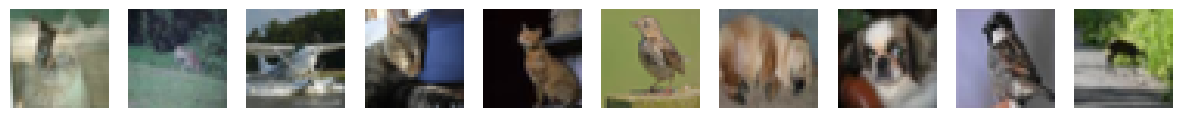

In [26]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    img = images[i].permute(1, 2, 0).numpy()
    img = (img * 0.5) + 0.5
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()


### Class distribution

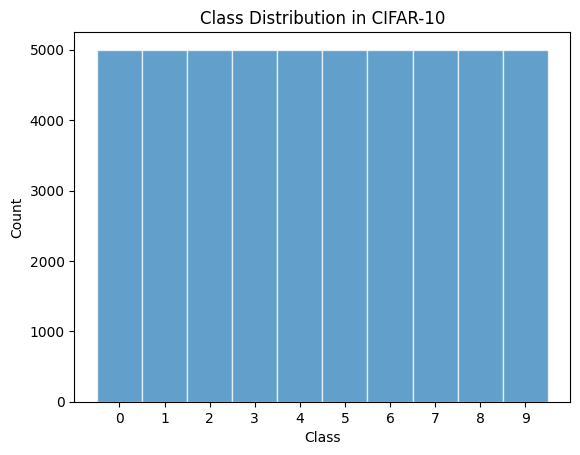

In [27]:
labels_list = [label for _, label in trainset]
plt.hist(labels_list, bins=np.arange(11) - 0.5, edgecolor='white', alpha=0.7)
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in CIFAR-10")
plt.show()

### Train function

In [28]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

def train_model(model, trainloader, epochs=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    start_time = time.time()

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        accuracy = 100 * correct / total
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

    elapsed_time = time.time() - start_time
    minutes, seconds = divmod(int(elapsed_time), 60)
    print("Spent time:", minutes,":", seconds)


Using device: mps


### Simple neural network

In [29]:
import time

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3072, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3072)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

print("Training SimpleNN:")
simple_nn = SimpleNN()
train_model(simple_nn, trainloader)

Training SimpleNN:
Epoch 1, Loss: 1.7100, Accuracy: 40.21%
Epoch 2, Loss: 1.5577, Accuracy: 46.22%
Epoch 3, Loss: 1.4810, Accuracy: 48.76%
Epoch 4, Loss: 1.4303, Accuracy: 50.87%
Epoch 5, Loss: 1.3857, Accuracy: 52.43%
Spent time: 1 : 11


### Deeper neural network

In [30]:
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(3072, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3072)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


print("Training DeepNN:")
deep_nn = DeepNN()
train_model(deep_nn, trainloader)

Training DeepNN:
Epoch 1, Loss: 1.6960, Accuracy: 39.59%
Epoch 2, Loss: 1.5025, Accuracy: 46.96%
Epoch 3, Loss: 1.4112, Accuracy: 49.97%
Epoch 4, Loss: 1.3386, Accuracy: 52.84%
Epoch 5, Loss: 1.2842, Accuracy: 55.01%
Spent time: 1 : 41
